In [1]:
!pip install torch
import numpy as np

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
  Using cached nvidia_nvjitlink_cu12-12.4.127-py3-none-m

In [2]:
import matplotlib.pyplot as plt

In [3]:
import torch.nn as nn

In [4]:
import torch

torch.Size([200, 1])
torch.Size([200, 1])


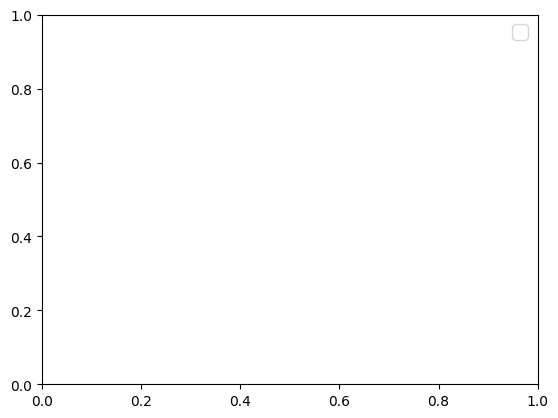

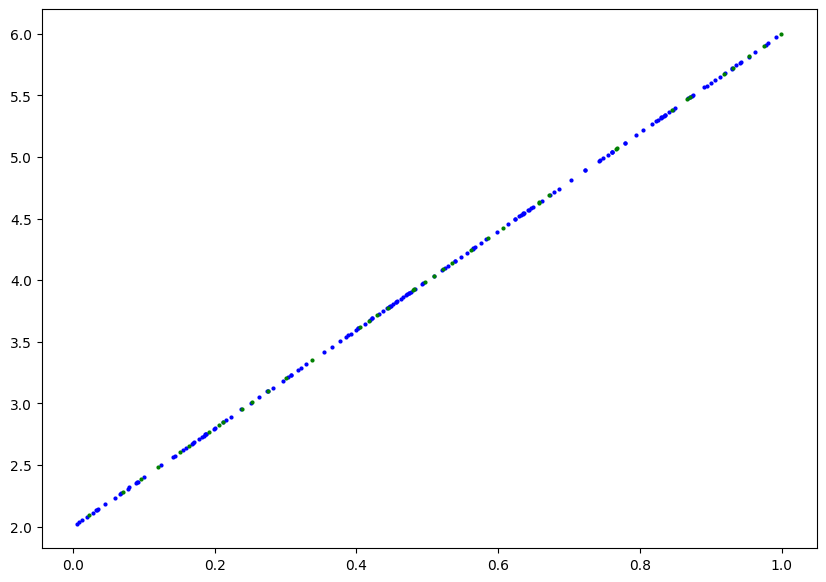

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights=nn.Parameter(torch.randn(1, requires_grad = True,dtype=torch.float32))
        self.bias=nn.Parameter(torch.randn(1,requires_grad = True,dtype=torch.float32))
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights*x + self.bias
torch.manual_seed(42)
model_0 = LinearRegressionModel()
list(model_0.parameters())
n=200
x=np.random.rand(n)
m=np.random.randint(3,5)
c=np.random.randint(2,3)
X=torch.from_numpy(x).unsqueeze(dim=1)
print(X.shape)
noise=np.random.randn(n)/4
noise=torch.from_numpy(x).unsqueeze(dim=1)
y=m*X+c+noise
print(y.shape)
X[:10],y[:10]
train_split=int(0.8*len(X))
X_train,y_train=X[:train_split],y[:train_split]
X_test,y_test=X[train_split:],y[train_split:]
len(X_train),len(X_test),len(y_train),len(y_test)
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")
  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
plt.legend(prop={"size": 14});
plot_predictions()

In [12]:

loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_0.parameters(),lr=1.00)
model_0 .eval()
with torch.inference_mode():
  test_preds = model_0(X_test)
test_preds

tensor([[0.4207],
        [0.1840],
        [0.2089],
        [0.3867],
        [0.3504],
        [0.2653],
        [0.4572],
        [0.1795],
        [0.1367],
        [0.2213],
        [0.3177],
        [0.2903],
        [0.3874],
        [0.1981],
        [0.4382],
        [0.3001],
        [0.1613],
        [0.2959],
        [0.3331],
        [0.1525],
        [0.2694],
        [0.3258],
        [0.4136],
        [0.3089],
        [0.1937],
        [0.2141],
        [0.3550],
        [0.2910],
        [0.3048],
        [0.2000],
        [0.2302],
        [0.2730],
        [0.3500],
        [0.2424],
        [0.4424],
        [0.1693],
        [0.4500],
        [0.4654],
        [0.4222],
        [0.2785]], dtype=torch.float64)

In [13]:
epoch = 1000
for epoch in range(epoch):
  model_0.train()
  y_pred = model_0(X_train)
  loss = loss_fn(y_pred,y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step
print(model_0.state_dict())


OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])
